# Damping of liquid sloshing by foams

We did 5 experiments by moving a fluid (water) container. The first experiment was without foam. The second one was with a foam layer of 1.5 cm and the third with 4.0 cm of foam. We repeated the last two experiment with an other kind of foam.

We are going to verify the underdamped oscillation formula
\begin{equation}
y(t) = Ae^{-\beta t}\cos(\omega t + \delta)
\end{equation}

In [1]:
import csv
import numpy as np # Math stuff
import pandas as pd # Manipulate data
from numpy import pi
from numpy import exp
from numpy import cos
from numpy import inf
import matplotlib.pyplot as plt # Plotting
from scipy.optimize import curve_fit # Params optimization
#Plot inside the notebook
%matplotlib inline 

In [2]:
# Drop the header. Run once per csv
def clean(file,file_output):
    with open(file,'r') as f:
        with open(file_output,'w') as f1:
            next(f) # skip header line
            for line in f:
                f1.write(line)
            f1.close()
            f.close()

In [3]:
clean('1.2_data.csv','1.21_data.csv')

In [4]:
# Load data
df_data = pd.read_csv('0.01_data.csv')
df_foam11_data = pd.read_csv('1.11_data.csv')
df_foam12_data = pd.read_csv('1.21_data.csv')
df_foam21_data = pd.read_csv('2.11_data.csv')
df_foam22_data = pd.read_csv('2.21_data.csv')
# Set time and y for every .csv
# Without foam
t_data = df_data['t'] # s
y_data = df_data['y'] # m
# First foam (1st and 2nd foam layer)
t_foam11 = df_foam11_data['t'] # s
y_foam11 = df_foam11_data['y'] # m
t_foam12 = df_foam12_data['t'] # s
y_foam12 = df_foam12_data['y'] # m
# Second foam (1st and 2nd foam layer)
t_foam21 = df_foam21_data['t'] # s
y_foam21 = df_foam21_data['y'] # m
t_foam22 = df_foam22_data['t'] # s
y_foam22 = df_foam22_data['y'] # m

In [5]:
# Exploring df's
print('df_data shape: ',df_data.shape)
print('df_foam11_data shape: ',df_foam11_data.shape)
print('df_foam12_data shape: ',df_foam12_data.shape)
print('df_foam21_data shape: ',df_foam21_data.shape)
print('df_foam22_data shape: ',df_foam22_data.shape)

df_data shape:  (230, 2)
df_foam11_data shape:  (75, 2)
df_foam12_data shape:  (63, 2)
df_foam21_data shape:  (151, 2)
df_foam22_data shape:  (117, 2)


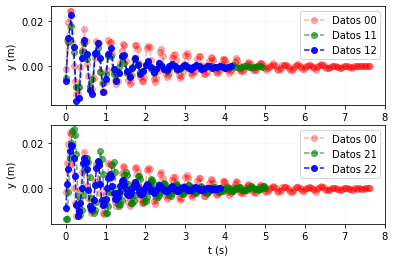

In [6]:
# Plot
fig, axs = plt.subplots(2)
# Plot first foam
axs[0].plot(t_data,y_data,'r--o',alpha=0.3,label='Datos 00')
axs[0].plot(t_foam11,y_foam11,'g--o',alpha=0.6,label='Datos 11')
axs[0].plot(t_foam12,y_foam12,'b--o',alpha=0.9,label='Datos 12')
axs[0].grid(True,alpha=0.1)
axs[0].legend()
# Plot second foam
axs[1].plot(t_data,y_data,'r--o',alpha=0.3,label='Datos 00')
axs[1].plot(t_foam21,y_foam21,'g--o',alpha=0.6,label='Datos 21')
axs[1].plot(t_foam22,y_foam22,'b--o',alpha=0.9,label='Datos 22')
axs[1].grid(True,alpha=0.1)
axs[1].legend()
# set axes label
for ax in axs.flat:
    ax.set(xlabel='t (s)', ylabel='y (m)')
#fig.savefig('all_data.png')

In [7]:
# Damped Oscillator
def damped_oscillator(t,A,b,w,d):
    '''
    ABLE TO SIMULATE A UNDERDAMPED OSCILLATOR.
    t array. Time.
    A float. Max amplitude.
    b float. Damping coefficient b < w0 (less than the undamped resonant frequency).
    w float. Frequency.
    d float. Gap.
    
    RETURN
    y array.
    '''
    y = A * exp(-b*t) * cos(w*t + d)
    return y

In [8]:
# For a better optimums parameters
# we set parameters initial guesses for every experiment (00,11,12,21,22)
# where [A,b,w,d]
guess_00 = [max(y_data),0.45,20.,-pi/4]
guess_11 = [max(y_foam11),0.9,20.,-pi/4]
guess_12 = [max(y_foam12),1.,20.,-pi/4]
guess_21 = [max(y_foam21),0.9,20.,-pi/4]
guess_22 = [max(y_foam22),1.,20.,-pi/4]

In [9]:
# For a better optimums parameters
# we set parameters boundaries for every experiment (00,11,12,21,22)
# where (minvalue,[max_A,max_b,max_w,max_d])
bound_00 = (-inf,[max(y_data),0.7,80.,inf])
bound_11 = (-inf,[max(y_foam11),2.,inf,inf])
bound_12 = (-inf,[max(y_foam12),3.,inf,inf])
bound_21 = (-inf,[max(y_foam21),2.,inf,inf])
bound_22 = (-inf,[max(y_foam22),3.,inf,inf])

In [10]:
# optimize params
# (it is optimized with least squares with method trf Trust Region Reflective algorithm)
def optimize(function,y_data,t_data,initial_guess,bounds):
    popt, pcov = curve_fit(function,y_data, t_data,p0=initial_guess,bounds=bounds)
    # print the final parameters
    print("\tA = %f, b = %f, w = %f, d = %f" % (popt[0], popt[1], popt[2], popt[3]))
    return popt[0], popt[1], popt[2], popt[3]

In [11]:
A_00, b_00, w_00, d_00 = optimize(damped_oscillator,y_data,t_data,guess_00,bound_00)
A_11, b_11, w_11, d_11 = optimize(damped_oscillator,y_foam11,t_foam11,guess_11,bound_11)
A_12, b_12, w_12, d_12 = optimize(damped_oscillator,y_foam12,t_foam12,guess_12,bound_12)
A_21, b_21, w_21, d_21 = optimize(damped_oscillator,y_foam21,t_foam21,guess_21,bound_21)
A_22, b_22, w_22, d_22 = optimize(damped_oscillator,y_foam22,t_foam22,guess_22,bound_22)

	A = 0.024435, b = 0.449988, w = 19.999114, d = 0.001244
	A = 0.017738, b = 0.904886, w = 19.996544, d = 6.290134
	A = 0.022411, b = 1.005315, w = 19.998318, d = 0.006167
	A = 0.026222, b = 0.901807, w = 19.998652, d = 0.006851
	A = 0.019122, b = 1.308651, w = 20.184601, d = 125.668458


In [12]:
y_00 = damped_oscillator(t_data,A_00,b_00,w_00,d_00)
y_11 = damped_oscillator(t_foam11,A_11,b_11,w_11,d_11)
y_12 = damped_oscillator(t_foam12,A_12,b_12,w_12,d_12)
y_21 = damped_oscillator(t_foam21,A_21,b_21,w_21,d_21)
y_22 = damped_oscillator(t_foam22,A_22,b_22,w_22,d_22)

In [13]:
def deviation(y,error):
    y = np.array(y)
    return (y - 1 * error,y + 1 * error)

In [14]:
error = 0.001 # m
err_00_low, err_00_high = deviation(y_00,error)
err_11_low, err_11_high = deviation(y_11,error)
err_12_low, err_12_high = deviation(y_12,error)
err_21_low, err_21_high = deviation(y_21,error)
err_22_low, err_22_high = deviation(y_22,error)

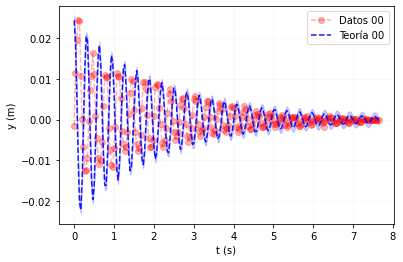

In [15]:
# Plot experiment 00: data vs theory
plt.plot(t_data,y_data,'r--o',alpha=0.3,label='Datos 00')
plt.plot(t_data,y_00,'b--',alpha=0.9,label='Teoría 00')
plt.fill_between(t_data,err_00_low, err_00_high,color='b', alpha=0.2)
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True,alpha=0.1)
#plt.savefig('dt00.png')
plt.show()

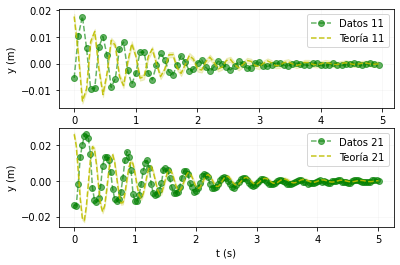

In [16]:
# Plot experiment n1: data vs theory
fig, axs = plt.subplots(2)
# Plot first foam
axs[0].plot(t_foam11,y_foam11,'g--o',alpha=0.6,label='Datos 11')
axs[0].plot(t_foam11,y_11,'y--',alpha=0.9,label='Teoría 11')
axs[0].fill_between(t_foam11,err_11_low, err_11_high,color='y', alpha=0.2)
axs[0].grid(True,alpha=0.1)
axs[0].legend()
# Plot second foam
axs[1].plot(t_foam21,y_foam21,'g--o',alpha=0.6,label='Datos 21')
axs[1].plot(t_foam21,y_21,'y--',alpha=0.9,label='Teoría 21')
axs[1].fill_between(t_foam21,err_21_low, err_21_high,color='y', alpha=0.2)
axs[1].grid(True,alpha=0.1)
axs[1].legend()
# set axes label
for ax in axs.flat:
    ax.set(xlabel='t (s)', ylabel='y (m)')
#fig.savefig('dt_n1.png')

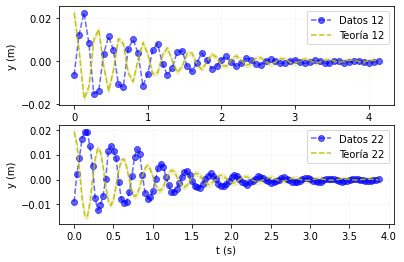

In [17]:
# Plot experiment n2: data vs theory
fig, axs = plt.subplots(2)
# Plot first foam
axs[0].plot(t_foam12,y_foam12,'b--o',alpha=0.6,label='Datos 12')
axs[0].plot(t_foam12,y_12,'y--',alpha=0.9,label='Teoría 12')
axs[0].fill_between(t_foam12,err_12_low, err_12_high,color='y', alpha=0.2)
axs[0].grid(True,alpha=0.1)
axs[0].legend()
# Plot second foam
axs[1].plot(t_foam22,y_foam22,'b--o',alpha=0.6,label='Datos 22')
axs[1].plot(t_foam22,y_22,'y--',alpha=0.9,label='Teoría 22')
axs[1].fill_between(t_foam22,err_22_low, err_22_high,color='y', alpha=0.2)
axs[1].grid(True,alpha=0.1)
axs[1].legend()
# set axes label
for ax in axs.flat:
    ax.set(xlabel='t (s)', ylabel='y (m)')
#fig.savefig('dt_n2.png')

In [18]:
# It fits but the gap
new_gap = -2.5
y_00 = damped_oscillator(t_data,A_00,b_00,w_00,new_gap)
y_11 = damped_oscillator(t_foam11,A_11,b_11,w_11,new_gap)
y_12 = damped_oscillator(t_foam12,A_12,b_12,w_12,new_gap)
y_21 = damped_oscillator(t_foam21,A_21,b_21,w_21,new_gap)
y_22 = damped_oscillator(t_foam22,A_22,b_22,w_22,new_gap)

error = 0.001 # m
err_00_low, err_00_high = deviation(y_00,error)
err_11_low, err_11_high = deviation(y_11,error)
err_12_low, err_12_high = deviation(y_12,error)
err_21_low, err_21_high = deviation(y_21,error)
err_22_low, err_22_high = deviation(y_22,error)

## Finally, the results

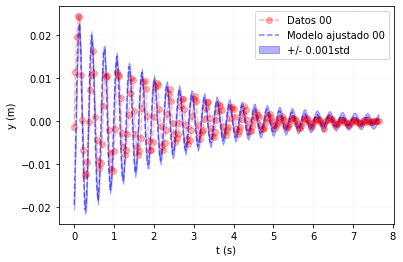

In [19]:
# Plot experiment 00: data vs theory
plt.plot(t_data,y_data,'r--o',alpha=0.3,label='Datos 00')
plt.plot(t_data,y_00,'b--',alpha=0.5,label='Teoría 00')
plt.fill_between(t_data,err_00_low, err_00_high,color='b', alpha=0.3)
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.legend(('Datos 00','Modelo ajustado 00','+/- 0.001std'))
plt.grid(True,alpha=0.1)
#plt.savefig('dt00.png')
plt.show()

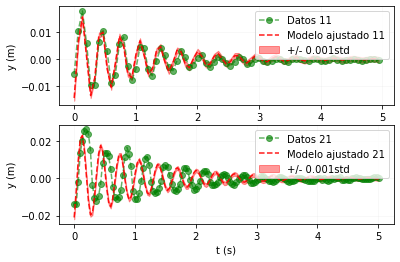

In [20]:
# Plot experiment n1: data vs theory
fig, axs = plt.subplots(2)
# Plot first foam
axs[0].plot(t_foam11,y_foam11,'g--o',alpha=0.6,label='Datos 11')
axs[0].plot(t_foam11,y_11,'r--',alpha=0.9,label='Teoría 11')
axs[0].fill_between(t_foam11,err_11_low, err_11_high,color='r', alpha=0.4)
axs[0].grid(True,alpha=0.1)
axs[0].legend(('Datos 11','Modelo ajustado 11','+/- 0.001std'))
# Plot second foam
axs[1].plot(t_foam21,y_foam21,'g--o',alpha=0.6,label='Datos 21')
axs[1].plot(t_foam21,y_21,'r--',alpha=0.9,label='Teoría 21')
axs[1].fill_between(t_foam21,err_21_low, err_21_high,color='r', alpha=0.4)
axs[1].grid(True,alpha=0.1)
axs[1].legend(('Datos 21','Modelo ajustado 21','+/- 0.001std'))
# set axes label
for ax in axs.flat:
    ax.set(xlabel='t (s)', ylabel='y (m)')
#fig.savefig('dt_n1.png')

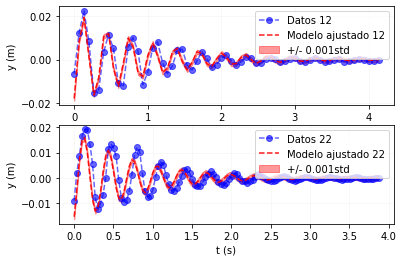

In [21]:
# Plot experiment n2: data vs theory
fig, axs = plt.subplots(2)
# Plot first foam
axs[0].plot(t_foam12,y_foam12,'b--o',alpha=0.6,label='Datos 12')
axs[0].plot(t_foam12,y_12,'r--',alpha=0.9,label='Teoría 12')
axs[0].fill_between(t_foam12,err_12_low, err_12_high,color='r', alpha=0.4)
axs[0].grid(True,alpha=0.1)
axs[0].legend(('Datos 12','Modelo ajustado 12','+/- 0.001std'))
# Plot second foam
axs[1].plot(t_foam22,y_foam22,'b--o',alpha=0.6,label='Datos 22')
axs[1].plot(t_foam22,y_22,'r--',alpha=0.9,label='Teoría 22')
axs[1].fill_between(t_foam22,err_22_low, err_22_high,color='r', alpha=0.4)
axs[1].grid(True,alpha=0.1)
axs[1].legend(('Datos 22','Modelo ajustado 22','+/- 0.001std'))
# set axes label
for ax in axs.flat:
    ax.set(xlabel='t (s)', ylabel='y (m)')
#fig.savefig('dt_n2.png')